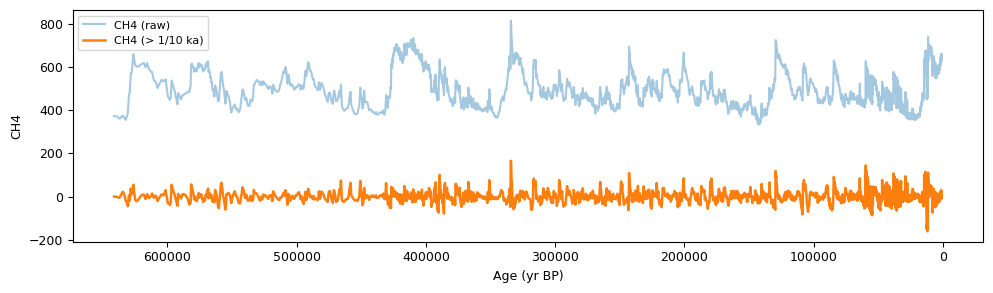

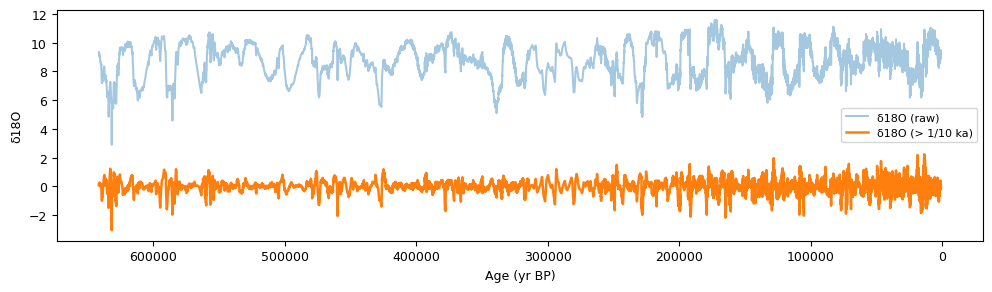

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


# 0) Load raw data
df_ch4 = pd.read_excel('other_data/CH4_AICC2023.xlsx', sheet_name='Sheet1')
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"
df_d18O = pd.read_excel(file_path)
df_d18O['age'] *= 1000  # to yrs BP
df_d18O['d18O'] = df_d18O['d18O'].values*-1
# renmae column d18O to 'd18O*-1'
df_d18O.rename(columns={'d18O': '-d18O'}, inplace=True)

dt=10
# 1) Build common 10-yr age grid over their overlap
age_min = 1000 # max(df_ch4['age'].min(), df_d18O['age'].min())
age_max = min(df_ch4['age'].max(), df_d18O['age'].max())
ages = np.arange(age_min, age_max + 1, dt)

# 2) Interpolate each onto that grid
ch4 = np.interp(ages, df_ch4['age'], df_ch4['ch4'])
d18O = np.interp(ages, df_d18O['age'], df_d18O['-d18O'])



df_ch4_interp = pd.DataFrame({'age':ages, 'ch4':ch4})
df_d18O_interp = pd.DataFrame({'age':ages, 'd18O':d18O})

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = True             # quick comparison plot
)




# df_filt_ch4, df_filt_d18O = sa.bandpass_ch4_d18o(
#     df_ch4_interp,
#     df_d18O_interp,
#     low_period = 300,     # keep variability slower than 300 yr
#     high_period = 10_000,  # and faster than 3 ka
#     flip_sign = False,
#     plot = True
# )

df_filt_d18O['filt_d18O'] = df_filt_d18O['filt_d18O'].rolling(window=5, min_periods=1).mean()
# drop NaN values
df_filt_d18O = df_filt_d18O.dropna()


# drop data with age <180,000
# df_filt_d18O = df_filt_d18O[df_filt_d18O['age'] >= 180_000]



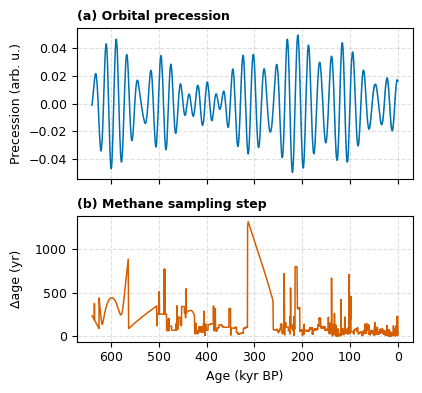

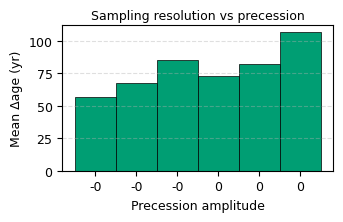

In [27]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

fig_pair, fig_bar = sa.age_gap_ana(
    df_d18O,
    age_min=0,
    age_max=640_000,
    pre_path=r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt",
    n_bins=6,
    tolerance=200
)



In [2]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


fig = sa.age_gap_interactive(
    df_d18O,
    age_min=0,
    age_max=640_000,
    H_line=100,
)
fig.show()

Maximum Δage within 0-640000 yr BP: 1316 years
95% quantile of Δage: 257 years


# TE dT plot

In [2]:
# from toolbox import sq_ana as sa
# import importlib
# importlib.reload(sa)
# import numpy as np

# # parameters
# window_size = 400_000     # size of sliding window in years
# step = 10_000             # step size in years

# df = df_filt_d18O.copy()
# # overall age range
# age_min = df['age'].min()
# age_max = df['age'].max()

# # prepare to collect results
# all_results = []

# # slide the window from age_min to age_max
# for start in np.arange(age_min, age_max - window_size + 1, step):
#     end = start + window_size
#     # crop the dataframe for the current window
#     df_crop = df[(df['age'] >= start) & (df['age'] <= end)]

#     # skip if there is not enough data in this window
#     if df_crop.empty:
#         continue

#     print(f"Running TE scan for window {int(start)} to {int(end)} years")

#     # run the transfer entropy vs dt scan
# dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]  # time steps in years
# for start in np.arange(age_min, age_max - window_size + 1, step):
#     end = start + window_size
#     # print start and end of the window
#     print(f"Processing window: {int(start)} to {int(end)} years")
#     df_crop = df[(df['age'] >= start) & (df['age'] <= end)]
#     if df_crop.empty:
#         continue

#     te_df, (fig, ax) = sa.te_vs_dt_scan(
#         df_crop,
#         dt_steps,
#         forcing_bins=6,
#         sq_bins=2,
#         k=2,
#         n_surr=100,
#         alpha=0.05,
#         sq_method='hist',
#         dpi=150
#     )

#     # annotate results with window boundaries
#     te_df['window_start'] = start
#     te_df['window_end'] = end

#     # collect
#     all_results.append(te_df)

# # combine all window results into one DataFrame
# import pandas as pd
# results_df = pd.concat(all_results, ignore_index=True)

# # inspect
# print(results_df)


# TE dT plot

     dt     te_xy  p_xy     te_yx  p_yx  sig_uni
0    10  0.000408  0.00  0.000215  0.09     True
1    20  0.000855  0.00  0.000490  0.07     True
2    30  0.001159  0.00  0.000743  0.02    False
3    40  0.001810  0.00  0.000956  0.04    False
4    50  0.002109  0.00  0.000884  0.21     True
5    60  0.002104  0.00  0.000927  0.38     True
6    70  0.002709  0.00  0.001368  0.19     True
7    80  0.003092  0.00  0.001212  0.40     True
8    90  0.001134  0.65  0.001936  0.13    False
9   100  0.003077  0.01  0.001816  0.19     True
10  200  0.003020  0.50  0.004372  0.07    False


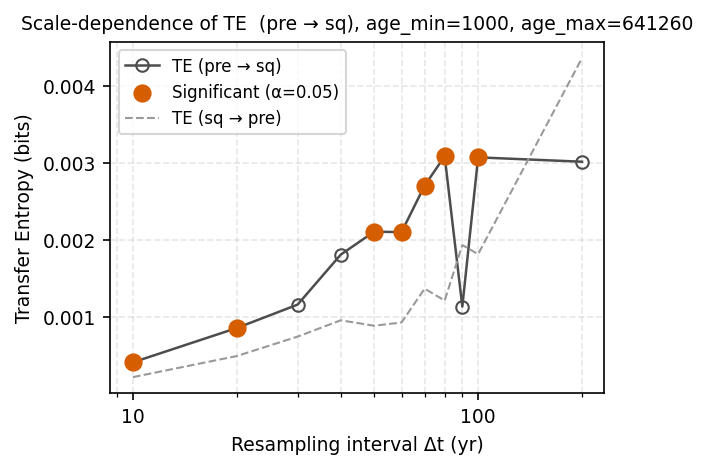

In [29]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing='pre',
    forcing_bins=6, sq_bins=2,
    k=1,                          # embedding dimension
    n_surr=100, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000600  0.000  0.000104  0.768     True
1    20  0.001235  0.000  0.000194  0.804     True
2    30  0.001834  0.000  0.000191  0.964     True
3    40  0.002273  0.000  0.000412  0.790     True
4    50  0.003409  0.000  0.000532  0.761     True
5    60  0.002903  0.000  0.000442  0.915     True
6    70  0.003747  0.000  0.000750  0.739     True
7    80  0.003682  0.000  0.001101  0.493     True
8    90  0.002421  0.038  0.000730  0.826     True
9   100  0.003532  0.002  0.001642  0.299     True
10  200  0.003668  0.289  0.003713  0.172    False


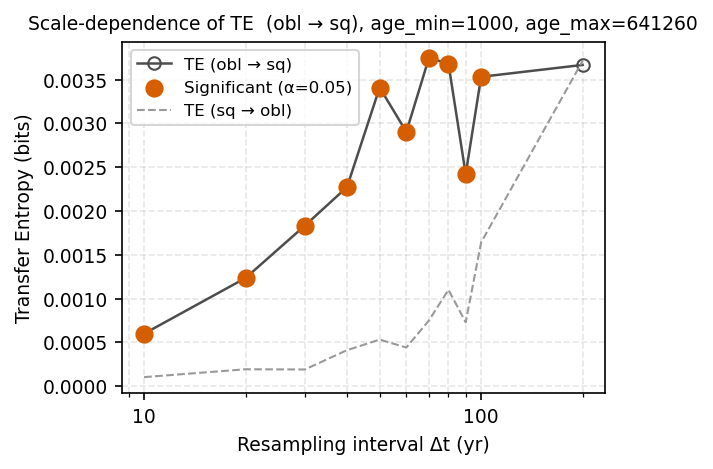

In [3]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_d18O,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=6, sq_bins=2,
    n_surr=1000, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)
 

# TE from pre and obl to Speleothem d18O MCV

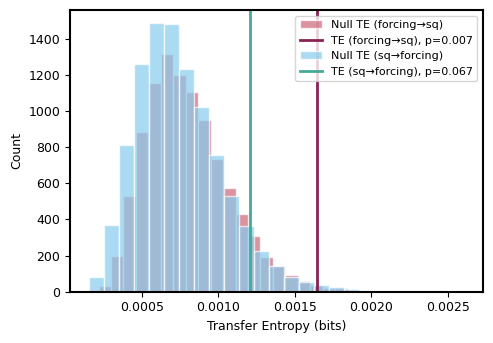

True


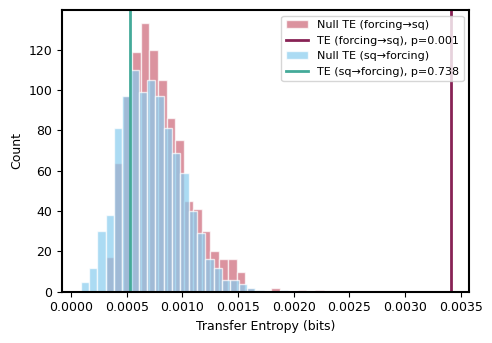

True


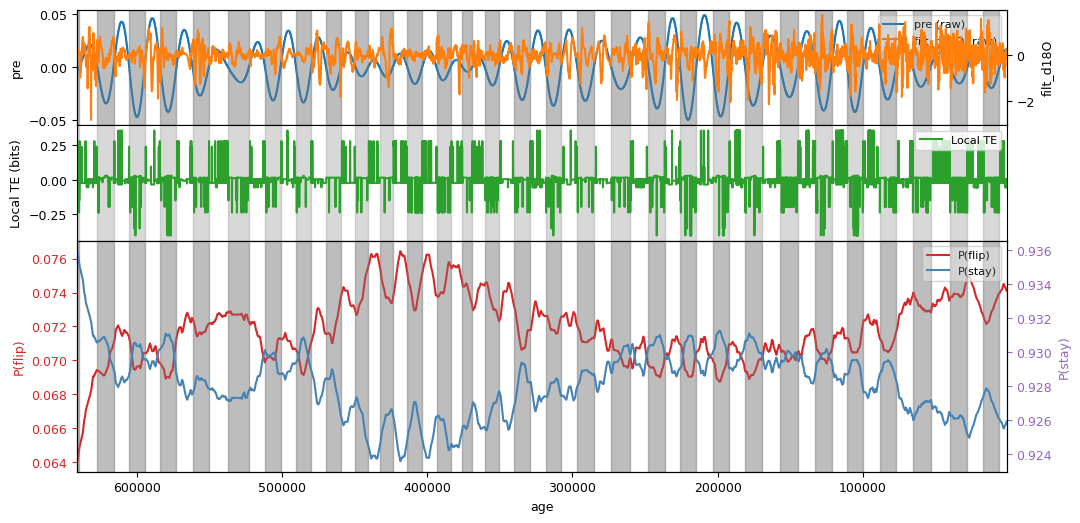

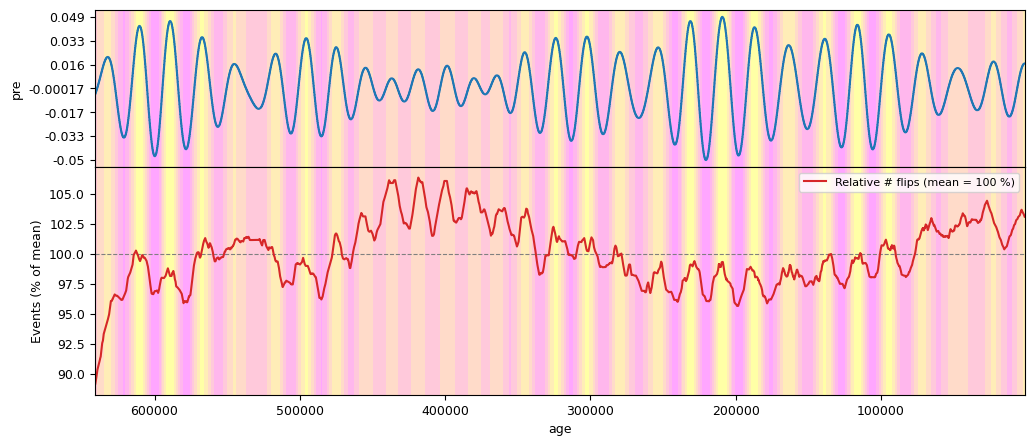

[ 89.14415495  89.14415495  89.14415495 ... 103.1540622  103.1306849
 103.1195243 ]


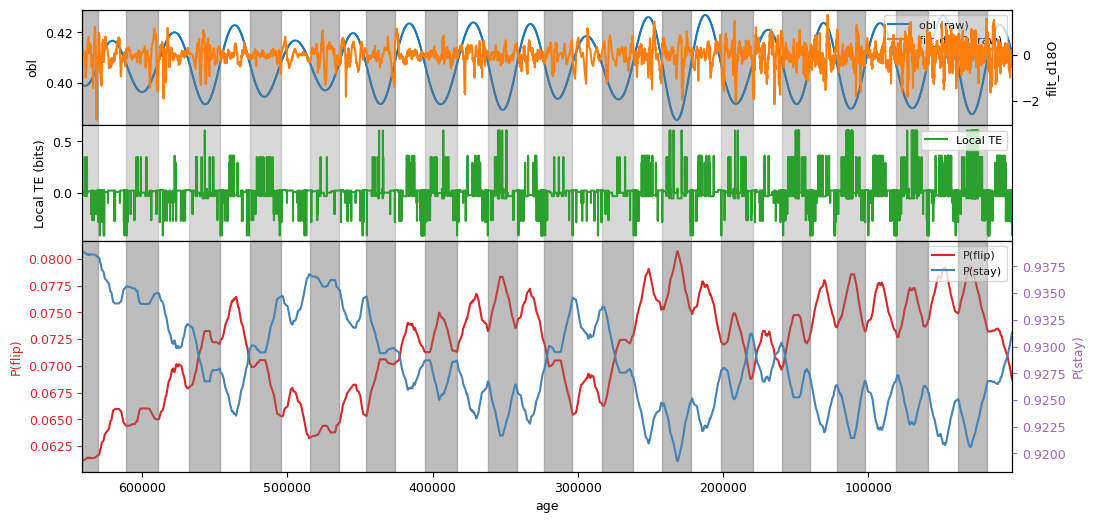

In [33]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt=50


# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy()[(df_filt_d18O['age'] > 71000) & (df_filt_d18O['age'] <= 191000)], dt, if_plot=False)

df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), dt, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig, te_pre=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=10000,sq_method='quantile')

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig, te_obl=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=1000)
print(result)


flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=1000)

flip_events =sa. flip_events(df_pre_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='pre',
        time_column='age',
        nbins_pre=6)

print(flip_events)


flip_prob_obl, stay_prob_obl, local_te_obl = sa.local_TE_prob(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=1000)


# LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)




# LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)



# Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)




# Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)


# Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
#                    forcing_column='pre',
#                    target_column='filt_d18O',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)

# TE on exccentricity

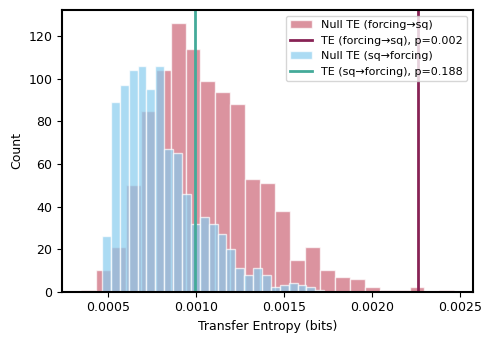

True


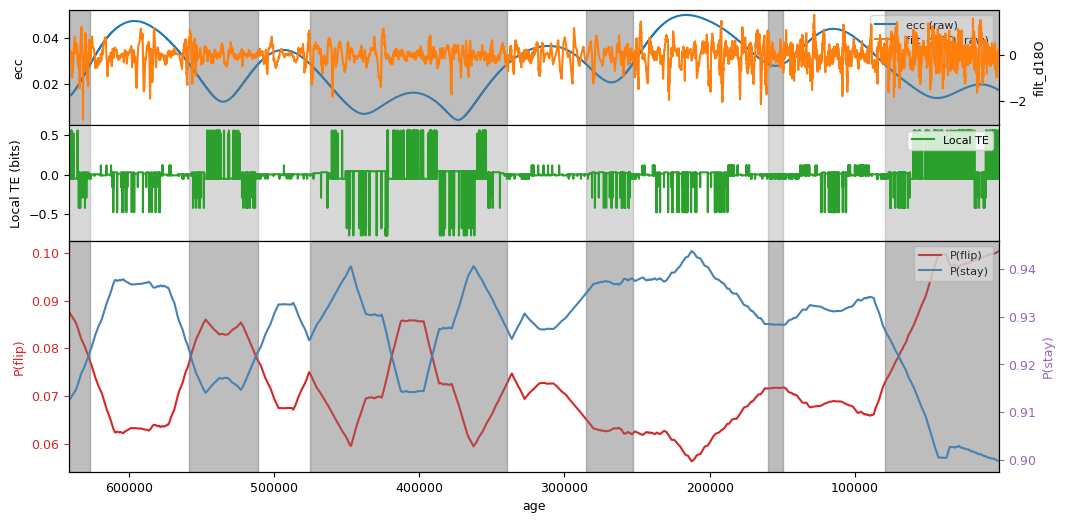

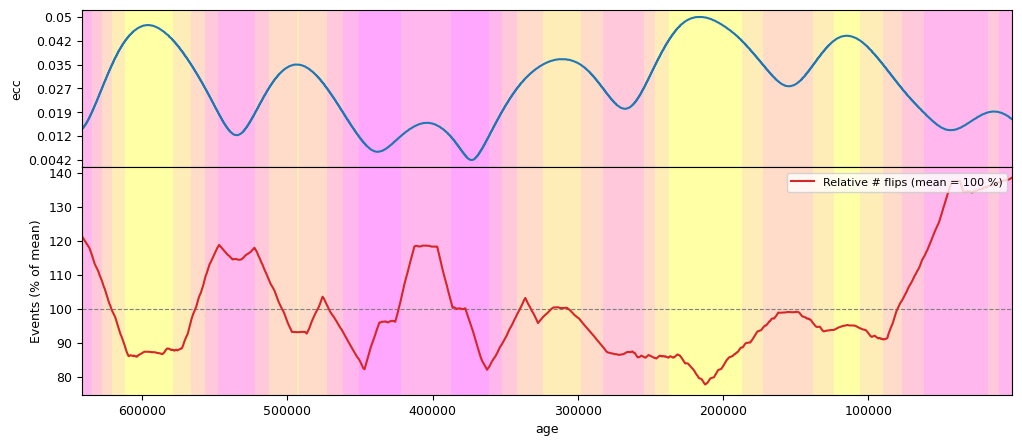

In [20]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

dt = 50
df_sq_i, df_ecc_i = sa.interpolate_data_ecc(df_filt_d18O.copy(), dt, if_plot=False)


ecc = df_ecc_i['ecc'].values      # source (precession)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig, te_pre=sa.transfer_entropy_surrogate_test(ecc,sq, forcing_bins=8, sq_bins=2, n_surr=1000,sq_method='hist')

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


flip_prob, stay_prob, local_te = sa.local_TE_prob(df_ecc_i.copy(), df_sq_i.copy(),
                   forcing_column='ecc',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=1000)

flip_events =sa. flip_events(df_ecc_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='ecc',
        time_column='age',
        nbins_pre=6)

# An alternative null, IAAF

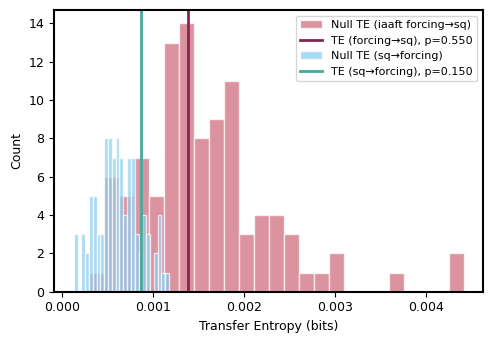

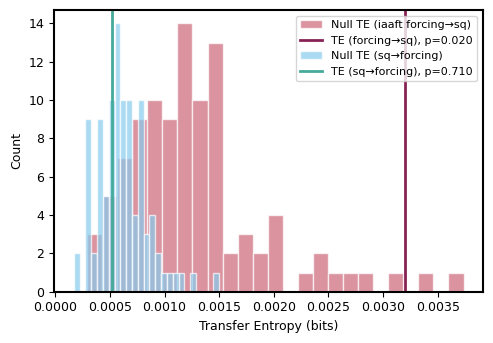

In [3]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt = 50
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), dt, if_plot=False)

pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

# result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(pre,sq, forcing_bins=8, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='phase',k=1)
# result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(obl,sq, forcing_bins=8, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='phase', k=1)

result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='iaaft',k=1)
result,fig, te_pre=sa.transfer_entropy_specsurrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100,sq_method='hist', surrogate_type='iaaft', k=1)



# Lag tests

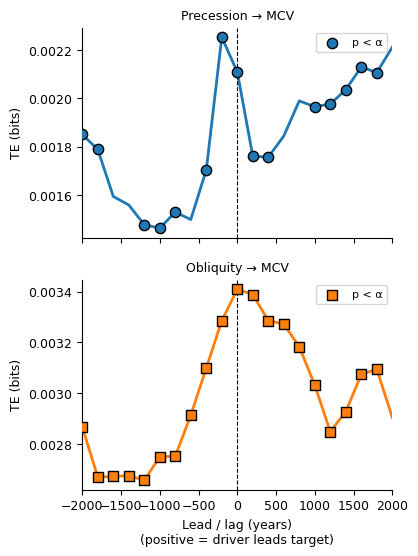

In [4]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_params = dict(forcing_bins=6, sq_bins=2, n_surr=100, sq_method='hist')
results, fig = sa.run_lag_te(
    pre, obl, sq,
    STEP    = 200,
    max_lag = 2000,
    plot    = True,
    **te_params
)


# Different cutoff freq

In [ ]:
import numpy as np

dt = 50  # sampling interval (years)

for cutoff in range(8000, 12001, 1000):          # 8–18 kyr in 1-kyr steps

    df_filt_ch4_temp, df_filt_d18O_temp = sa.highpass_ch4_d18O(
        df_ch4_interp,          # DataFrame with columns ['age','ch4']
        df_d18O_interp,         # columns ['age','d18O']
        cutoff_period = cutoff, # high-pass >1/10 ka
        plot = False             # quick comparison plot
    )
    df_filt_d18O_temp['filt_d18O'] = df_filt_d18O_temp['filt_d18O'].rolling(window=5, min_periods=1).mean()
    # drop NaN values
    df_filt_d18O_temp = df_filt_d18O_temp.dropna()
    
    # 2. resample + merge forcings (no plot)
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_filt_d18O_temp.copy(),
        dt,
        if_plot=False
    )

    # 3. fetch NumPy arrays
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_d18O'].values

    # 4. TE tests (figures off)
    res_pre, _, te_pre = sa.transfer_entropy_surrogate_test(
        pre, sq,
        forcing_bins=6, sq_bins=2,
        n_surr=1000, sq_method='hist',
        if_plot=False
    )
    res_obl, _, te_obl = sa.transfer_entropy_surrogate_test(
        obl, sq,
        forcing_bins=6, sq_bins=2,
        n_surr=1000,sq_method='hist',
        if_plot=False
    )

    # 5. print summary
    print(
        f"Cutoff = {cutoff/1000:.0f} kyr | "
        f"Precession→MCV sig: {res_pre}, TE = {te_pre:.4f} bits | "
        f"Obliquity→MCV sig: {res_obl}, TE = {te_obl:.4f} bits"
    )


Cutoff = 8 kyr | Precession→MCV sig: True, TE = 0.0015 bits | Obliquity→MCV sig: True, TE = 0.0021 bits
Cutoff = 9 kyr | Precession→MCV sig: True, TE = 0.0015 bits | Obliquity→MCV sig: True, TE = 0.0026 bits
Cutoff = 10 kyr | Precession→MCV sig: True, TE = 0.0021 bits | Obliquity→MCV sig: True, TE = 0.0034 bits
Cutoff = 11 kyr | Precession→MCV sig: True, TE = 0.0018 bits | Obliquity→MCV sig: True, TE = 0.0029 bits
Cutoff = 12 kyr | Precession→MCV sig: True, TE = 0.0017 bits | Obliquity→MCV sig: True, TE = 0.0021 bits


# Where the TE comes from

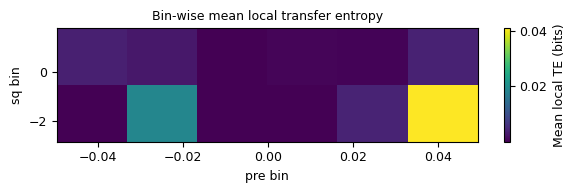

In [27]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

[  2.           2.12812814   2.26446468   2.4095355    2.56390015
   2.72815402   2.90293066   3.08890421   3.28679198   3.49735724
   3.72141217   3.95982098   4.21350322   4.48343737   4.77066461
   5.07629279   5.40150076   5.74754287   6.11575384   6.50755391
   6.92445429   7.368063     7.84009109   8.34235921   8.87680468
   9.4454889   10.05060534  10.694488    11.37962041  12.10864518
  12.88437425  13.70979967  14.58810521  15.52267857  16.5171245
  17.57527869  18.70122254  19.89929892  21.17412896  22.5306298
  23.97403359  25.50990771  27.14417617  28.88314251  30.73351411
  32.70242805  34.79747861  37.02674665  39.39883066  41.92288002
  44.60863025  47.46644056  50.50733383  53.74303909  57.1860368
  60.84960694  64.74788029  68.89589288  73.30964404  78.00615805
  83.00354985  88.3210949   93.97930352 100.        ]
max-power row = 23   →  period ≈ 23.2 ka


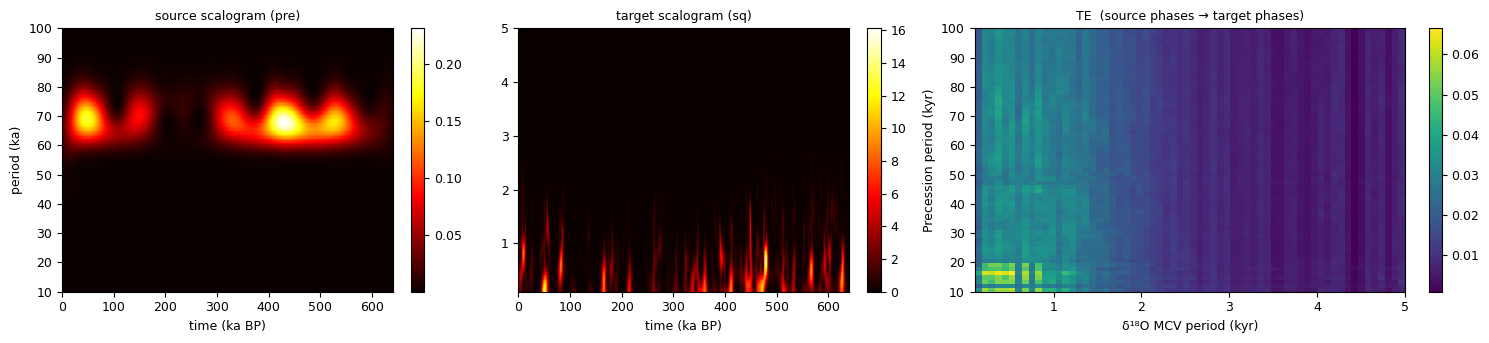

In [4]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    sampling_period = dt,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 10_000,
    src_max_period = 100_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 2*dt,
    trg_max_period = 5_000,
    n_trg_scales   = 64,
    k = 1,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='δ¹⁸O MCV'        # e.g. 'sq'
)

# P stay P flip analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


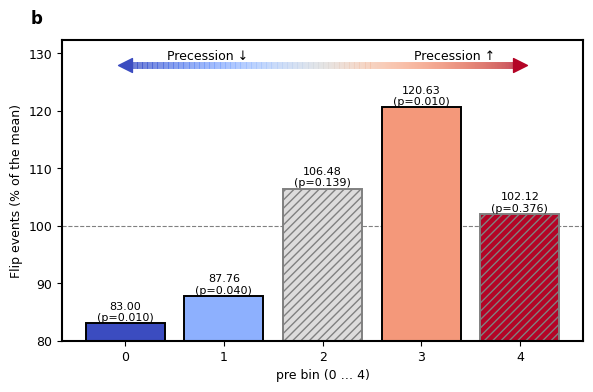

Figure saved as 'Figure_saved/Sple_d18O_prebins_events_surr_relative.pdf'


In [9]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_events_surr_relative(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_d18O',
        sq_method='quantile',
        nbins_pre=5,
        n_surr=100,
        window =20_000,
        alpha=0.05,
        y_min=None,
        y_max=None,
        random_state=None,   # reproducible
        dpi=100,
        panel_label="b",
        save_figure=True,    # save figure to /Figure_saved
        proxy_name='Sple_d18O'    # merge the proxy name into the file name
)








# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_pre_i, df_sq_i,
#         forcing_column='pre',
#         target_column='filt_d18O',
#         nbins_pre=6,
#         n_surr=100,
#         alpha=0.05,
#         y_min=0.8,
#         y_max=0.98,
#         random_state=0   # reproducible
# )


# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_d18O',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

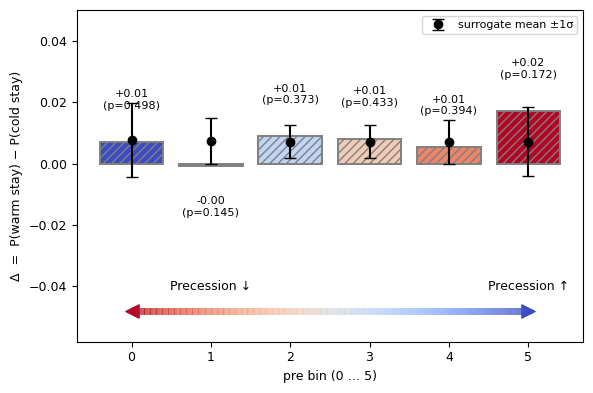

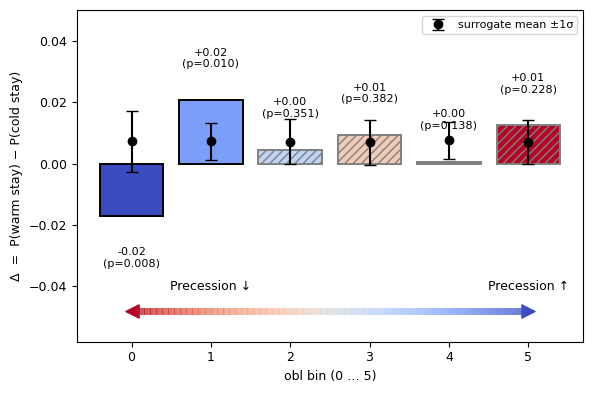

In [ ]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_d18O',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_obl_i,
    df_sq       = df_sq_i,
    forcing_column='obl',
    target_column='filt_d18O',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)

# Predict future No. events

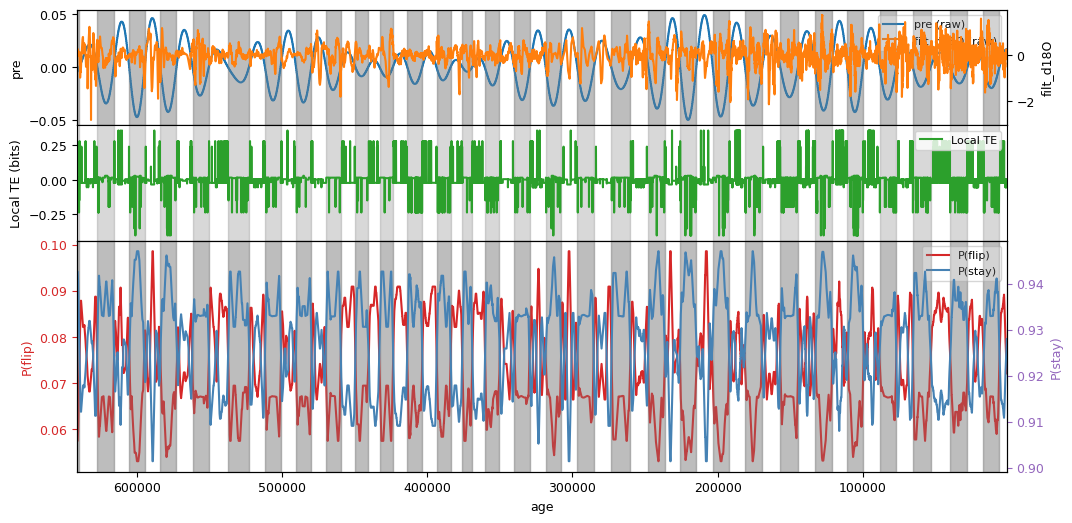

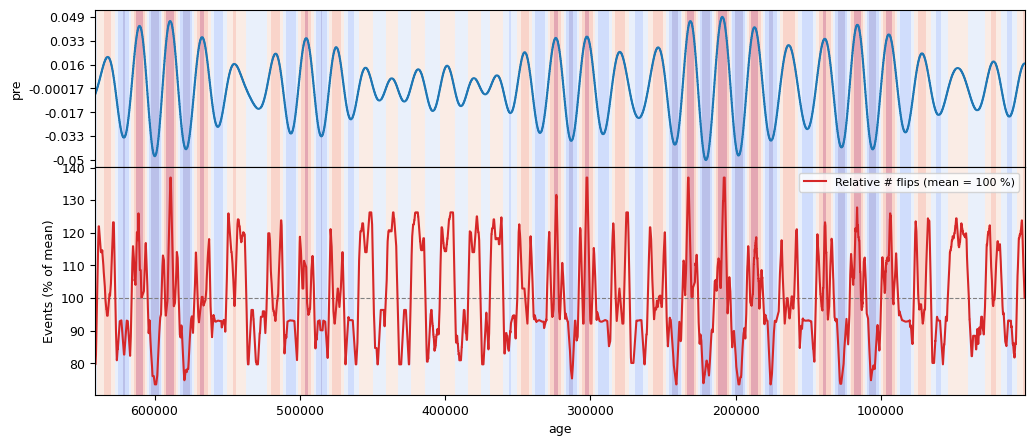

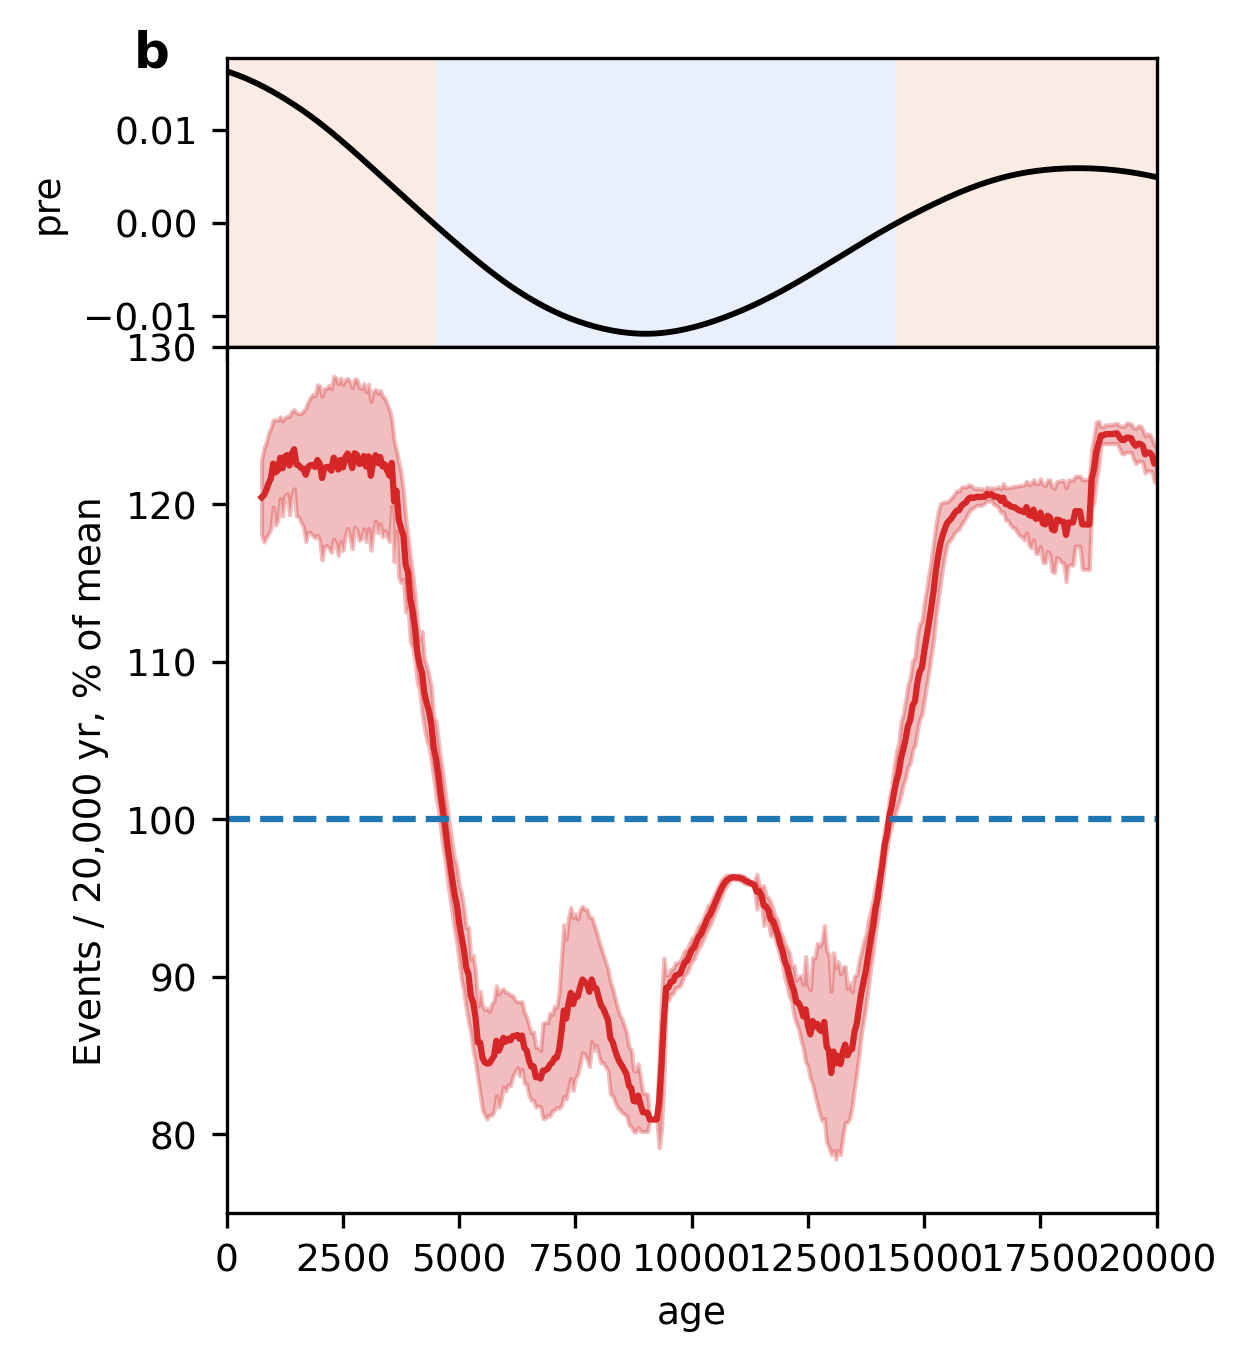

In [13]:
df_pre_future_resampled = pd.read_csv('D:/Vscode/bipolar_seesaw_CCM/inso_data/pre_future_0_20kyr_inter100.csv')



from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)



flip_prob, stay_prob, local_te = sa.local_TE_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=40)

events_train =sa. flip_events(df_pre_i.copy(),
        flip_prob,
        window=20_000,              # yrs; make this whatever you like
        forcing_column='pre',
        time_column='age',
        nbins_pre=6,
        cmap_name='coolwarm',
        )



events_mean, events_lower, events_upper = sa.predict_events_future_ccm(df_pre_i.copy()[1:], events_train,
                            df_pre_future_resampled,
                            E=6, tau=3, band_sigma=1,  
                            cmap_name='coolwarm',
                            show_legend=False,
                                panel_label="b",
                                dpi=300,
                                save_fig=True,    # save figure to /Figure_saved
                            )



# The following are sensitivity tests

# Bin count

(21343,) (21343,) (21343,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    629   1842   2456   2703   1657    707
sq=1    789   1688   3135   3014   1867    856


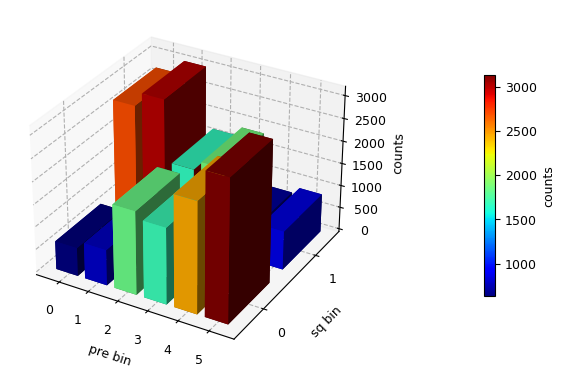

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0   1073   1864   1694   1513   2323   1527
sq=1    862   2677   1798   1836   2333   1843


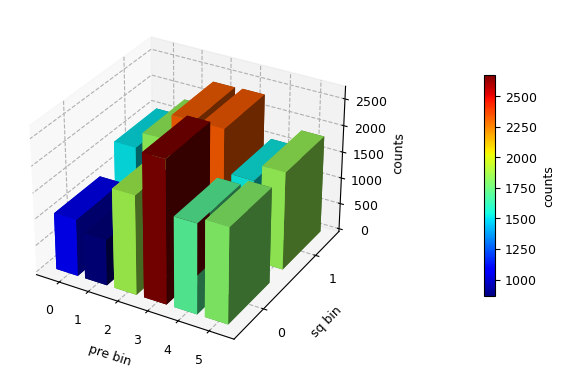

In [12]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

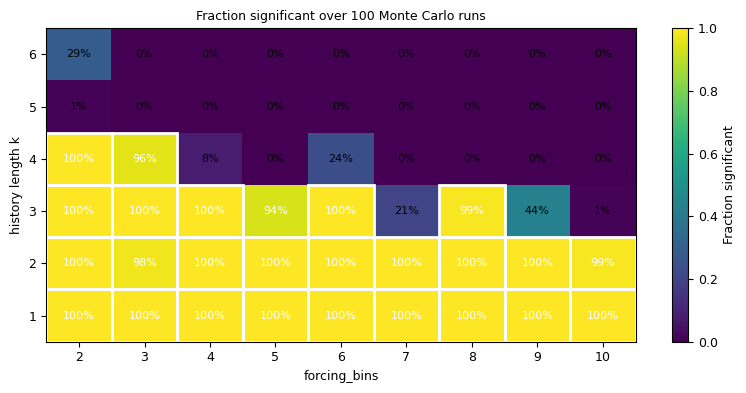

In [5]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 30, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_d18O'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

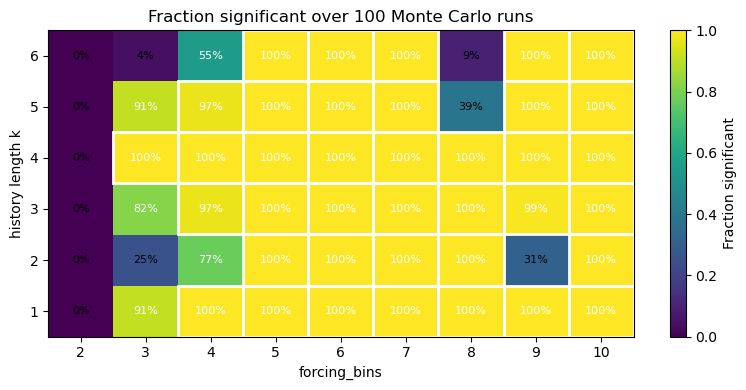

In [13]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 10, if_plot=False)

fractions= sa.mc_TE_heatmap(
    pre =df_obl_i['obl'].values,
    sq =df_sq_i['filt_d18O'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

# Influence of noise, test on different dt

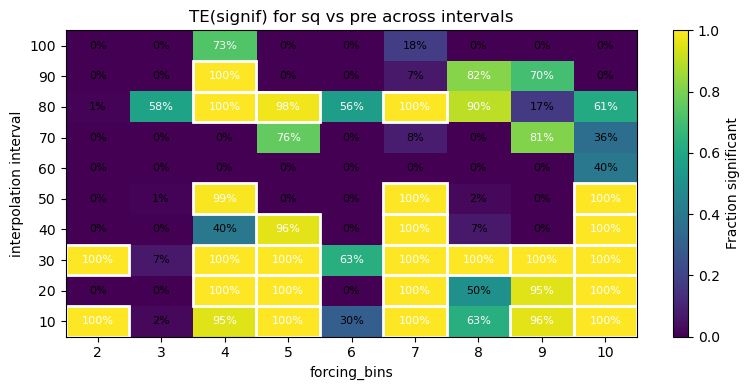

In [14]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)

f=sa.mc_TE_heatmap_inter(
    df_filt_d18O,
    target_column='filt_d18O',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

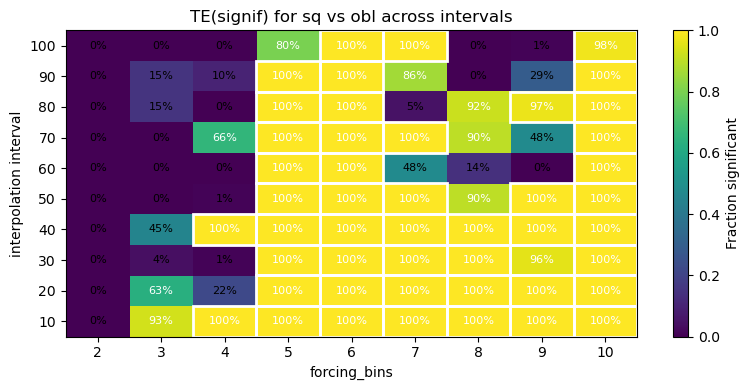

In [15]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)

f=sa.mc_TE_heatmap_inter(
    df_filt_d18O,
    target_column='filt_d18O',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='obl',
    plot=True
)

# Influence of age scale uncertainty: random scaling experiment

In [8]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 10000
max_age_ratio = max_age_error / np.max(df_filt_d18O['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_d18O.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 30, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_d18O'].values
    
    # test pre → sq
    result_pre, _ , _= sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ , _= sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 84 runs
  obl → sq was significant in 94 runs


# Influence of noise: random thining

In [15]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, False), (0.4, False), (0.6000000000000001, False), (0.8, False), (1.0, True)]
[(0.2, True), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]


# The influence of different bining plan ([max-min]/2; median; k-means)

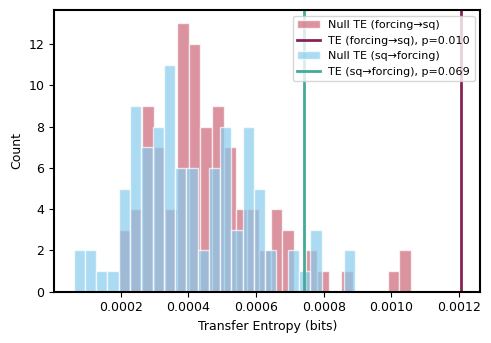

True


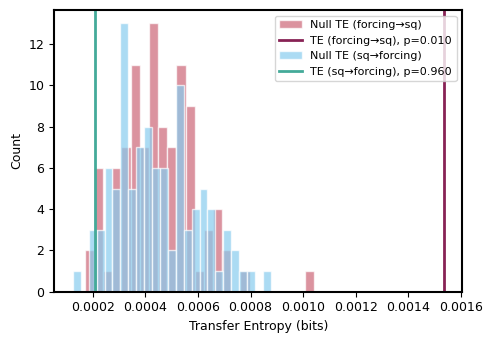

True


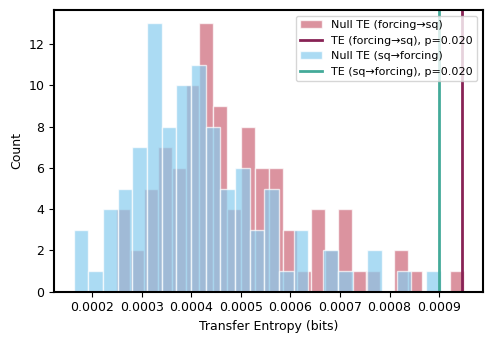

False


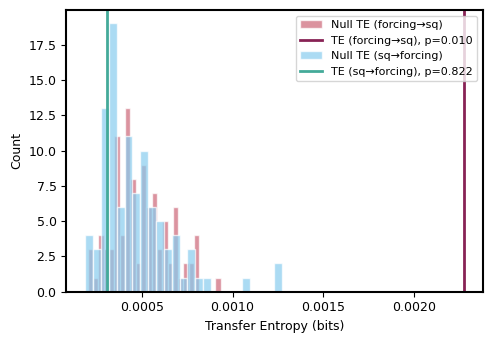

True


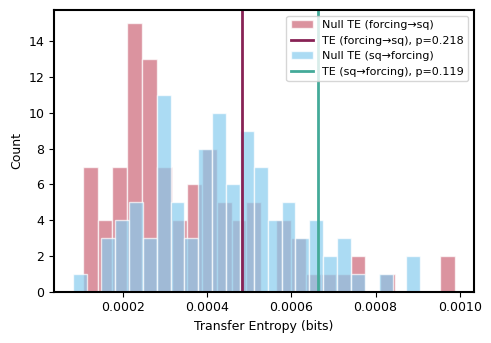

False


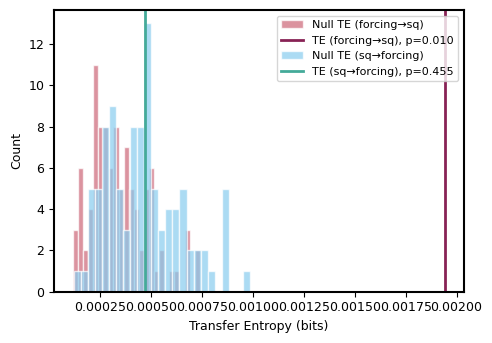

True


In [16]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_d18O.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

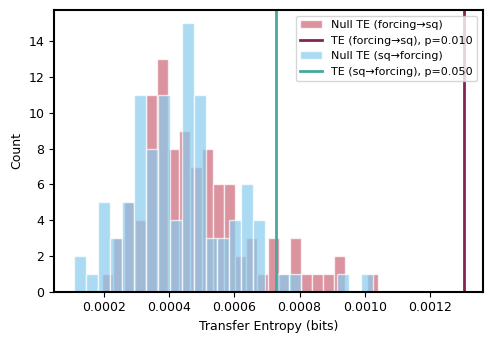

False


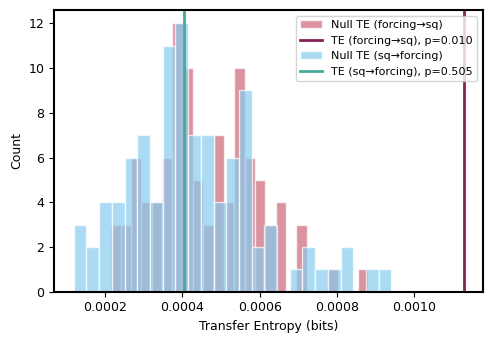

True


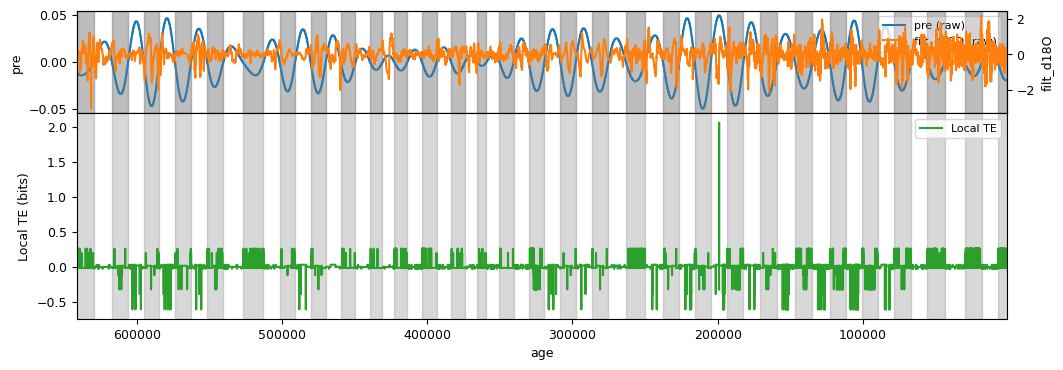

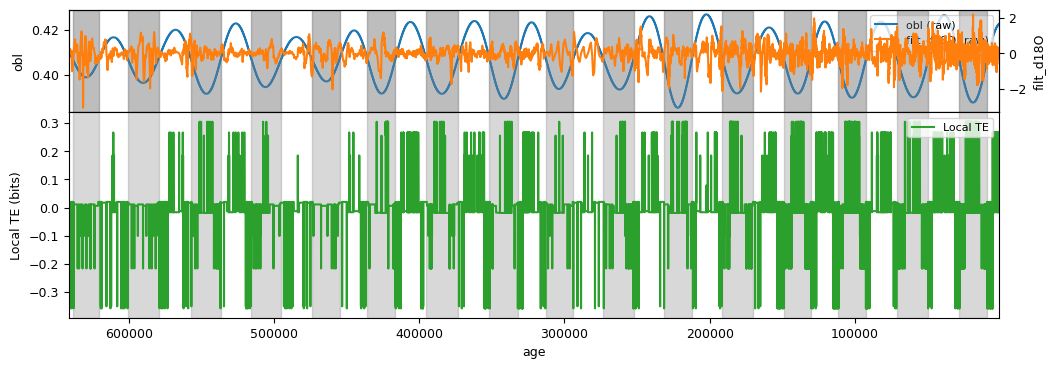

In [17]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_d18O.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_d18O'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_d18O',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

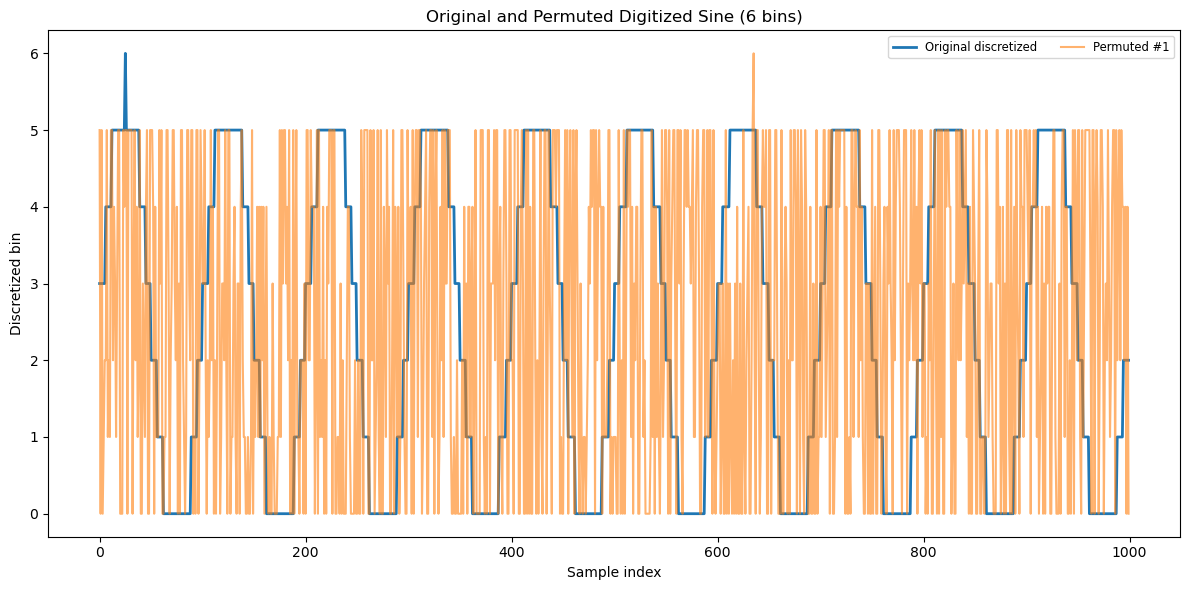

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The d18O bins

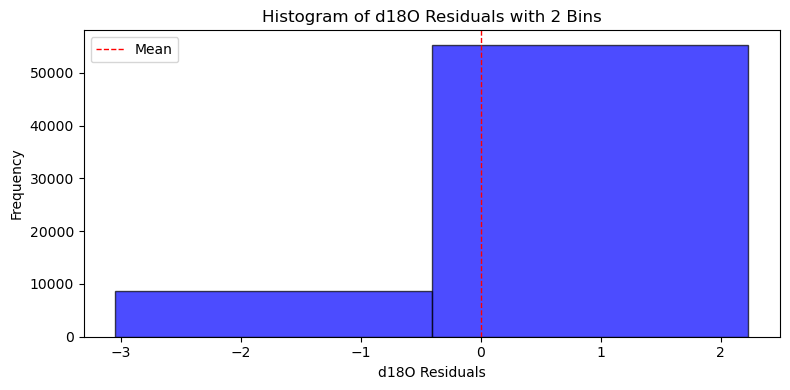

In [23]:
# plot the histogram of sq with bins=2
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of d18O Residuals with 2 Bins')
plt.xlabel('d18O Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()